<a href="https://colab.research.google.com/github/Leanse1/Computer-Vision-Basic-Projects/blob/main/CIFAR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR10 dataset**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
# to reshape the array into a 1D array
# -1 is used to ensure that the total number of elements remains the same in X and y
y_train = y_train.reshape(-1,)

In [6]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index, classes):
    plt.imshow(X[index])

    y_index = int(y[index]) if isinstance(y[index], np.ndarray) else int(y[index])

    if isinstance(y_index, int) and 0 <= y_index < len(classes):
        plt.title(f"Label: {classes[y_index]}")
    else:
        plt.title(f"Invalid Label: {y_index}")

    plt.show()

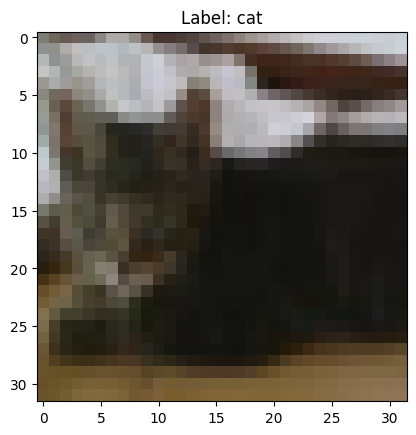

In [14]:
plot_sample(X_train, y_train, 9, classes)

In [11]:
X_train = X_train/255
X_test = X_test/255

# Try with ANN first

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',   # since values are 1 to 10: if 0 and 1 use categorical_crossentropyb
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8101 - accuracy: 0.3548
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6243 - accuracy: 0.4247
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5417 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4821 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4325 - accuracy: 0.4971


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.68      0.54      1000
           1       0.70      0.47      0.57      1000
           2       0.45      0.25      0.32      1000
           3       0.32      0.40      0.35      1000
           4       0.53      0.26      0.35      1000
           5       0.40      0.35      0.37      1000
           6       0.46      0.66      0.54      1000
           7       0.44      0.68      0.54      1000
           8       0.61      0.59      0.60      1000
           9       0.66      0.42      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



# Now let us use CNN

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
cnn = models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #ANN
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4547 - accuracy: 0.4787
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1120 - accuracy: 0.6092
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9858 - accuracy: 0.6565
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9029 - accuracy: 0.6849
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8371 - accuracy: 0.7086
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7860 - accuracy: 0.7281
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7398 - accuracy: 0.7425
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6976 - accuracy: 0.7557
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6590 - accuracy: 0.7688
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.62

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9152 - accuracy: 0.6936


[0.9151965975761414, 0.6935999989509583]

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_predict = cnn.predict(X_test)
y_predict_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_predict_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.68      0.54      1000
           1       0.70      0.47      0.57      1000
           2       0.45      0.25      0.32      1000
           3       0.32      0.40      0.35      1000
           4       0.53      0.26      0.35      1000
           5       0.40      0.35      0.37      1000
           6       0.46      0.66      0.54      1000
           7       0.44      0.68      0.54      1000
           8       0.61      0.59      0.60      1000
           9       0.66      0.42      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [26]:
y_trained = [np.argmax(element) for element in y_predict]
y_trained[:5]

[3, 8, 8, 8, 4]

In [28]:
y_test[:5].reshape(-1)

array([3, 8, 8, 0, 6], dtype=uint8)

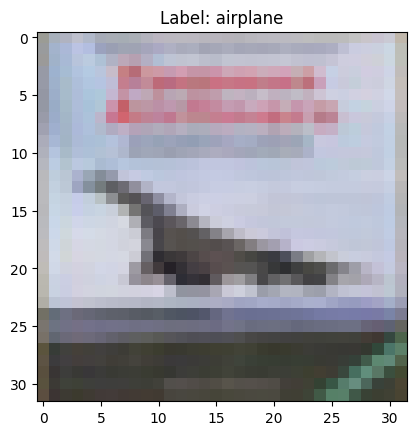

In [33]:
plot_sample(X_test, y_test,3, classes)

In [34]:
classes[y_classes[3]]

'airplane'